In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from collections import Counter
import glob

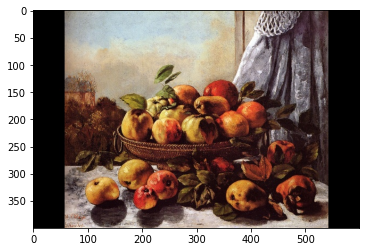

In [2]:
test_img = np.array(Image.open('../Data/Artist/genre/resized/still life/6110.jpg'))
plt.imshow(test_img)
plt.show()
test = test_img.reshape(-1, 400, 600, 3) / 255.0

In [3]:
model_port_still = keras.models.load_model('../Data/Artist/model/model_v3/H5/port_still_v3.h5')  
model_land_still = keras.models.load_model('../Data/Artist/model/model_v3/H5/land_still_v3.h5')  
model_land_port = keras.models.load_model('../Data/Artist/model/model_v3/H5/land_port_v3.h5')    

Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2022-08-04 16:26:39.632964: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-04 16:26:39.633079: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
# model_port_still = keras.models.load_model('../Data/Artist/model/model_classes/port_still.h5')  
# model_land_still = keras.models.load_model('../Data/Artist/model/model_classes/land_still.h5')  
# model_land_port = keras.models.load_model('../Data/Artist/model/model_classes/port_land.h5')    

In [5]:
classes1 = ['prtrait', 'stll life']

pred1 = model_port_still(test)
classes1[np.argmax(pred1)]

'stll life'

In [6]:
classes2= ['landscape', 'stll life']

pred2 = model_land_still(test)
classes2[np.argmax(pred2)]


'stll life'

In [7]:
classes3 = ['landscape', 'portrait']

pred3 = model_land_port(test)
pred3
classes3[np.argmax(pred3)]

'landscape'

In [8]:
pred = [classes1[np.argmax(pred1)], classes2[np.argmax(pred2)],classes3[np.argmax(pred3)]]

In [9]:
predx = Counter(pred)
predx.most_common(n=1)[0][0]

'stll life'

---
## 모델 테스트

In [10]:
stillLife_result = []
for file in glob.glob('../Data/Artist/genre/resized/still life/*.jpg'):
    img = np.array(Image.open(file), np.int32)
    img = img.reshape(-1, 400, 600, 3) / 255.0
    pred_1 = model_port_still(img)
    pred_2 = model_land_still(img)
    pred_3 = model_land_port(img)
    pred= [classes1[np.argmax(pred_1)], classes2[np.argmax(pred_2)],classes3[np.argmax(pred_3)]]
    pred_x = Counter(pred)
    stillLife_result.append(pred_x.most_common(n=1)[0][0])

In [11]:
Counter(stillLife_result)

Counter({'stll life': 334, 'prtrait': 14, 'landscape': 24})

In [12]:
portrait_result = []
for file in glob.glob('../Data/Artist/genre/resized/portrait/*.jpg'):
    img = np.array(Image.open(file), np.int32)
    img = img.reshape(-1, 400, 600, 3) / 255.0
    pred_1 = model_port_still(img)
    pred_2 = model_land_still(img)
    pred_3 = model_land_port(img)
    pred= [classes1[np.argmax(pred_1)], classes2[np.argmax(pred_2)],classes3[np.argmax(pred_3)]]
    pred_x = Counter(pred)
    portrait_result.append(pred_x.most_common(n=1)[0][0])

In [13]:
Counter(portrait_result)

Counter({'prtrait': 458, 'stll life': 35, 'landscape': 3})

In [14]:
landscape_result = []
for file in glob.glob('../Data/Artist/genre/resized/landscape/*.jpg'):
    img = np.array(Image.open(file), np.int32)
    img = img.reshape(-1, 400, 600, 3) / 255.0
    pred_1 = model_port_still(img)
    pred_2 = model_land_still(img)
    pred_3 = model_land_port(img)
    pred= [classes1[np.argmax(pred_1)], classes2[np.argmax(pred_2)],classes3[np.argmax(pred_3)]]
    pred_x = Counter(pred)
    landscape_result.append(pred_x.most_common(n=1)[0][0])

In [15]:
Counter(landscape_result)

Counter({'landscape': 344, 'stll life': 24, 'prtrait': 10})